### Import Libraries

In [1]:
import mlrose

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap

In [2]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.FourPeaks()

MAX_ITER = 50 
PROBLEM_SIZE = 50


max_iteration_list = list()
fitness_list_RHC = list()
fitness_list_SM = list()
fitness_list_GA = list()
fitness_list_MIMIC = list()
all_data = list()


# Define optimization problem object
problem = mlrose.DiscreteOpt(length = PROBLEM_SIZE, fitness_fn = fitness, maximize=True, max_val=2)

for MAX_ITER in range(20, 500, 20):  

    print("Running for max_iteration size: ", MAX_ITER)

    # # Define decay schedule
    schedule = mlrose.ExpDecay()

    np.random.seed(69)

    # Solve using random hill climbing
    best_state_RHC, best_fitness_RHC =  mlrose.random_hill_climb(problem, max_attempts=10, 
                                                                 max_iters=MAX_ITER, restarts=5, 
                                                                 init_state=None, curve=False, 
                                                                 random_state=None)

    # Solve using simulated annealing 
    best_state_SM, best_fitness_SM = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 50, 
                                                          max_iters = MAX_ITER, init_state = None)

    # Solve problem using the genetic algorithm
    best_state_GA, best_fitness_GA = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=10, 
                                                        max_iters=MAX_ITER, curve=False, random_state=None)

    # Solve problem using mimic
    best_state_MIMIC, best_fitness_MIMIC = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, 
                                                  max_iters=MAX_ITER, curve=False, random_state=None)
    
    
    # Append to each individual list 
    fitness_list_RHC.append(best_fitness_RHC)
    fitness_list_SM.append(best_fitness_SM)
    fitness_list_GA.append(best_fitness_GA)
    fitness_list_MIMIC.append(best_fitness_MIMIC)
    
    # Append Iteration size (For x-axis of our graph)
    max_iteration_list.append(MAX_ITER)
    
    # Append data to list (for dataframe later)
    all_data.append([MAX_ITER, best_fitness_RHC, best_fitness_SM, best_fitness_GA, best_fitness_MIMIC])
    

Running for max_iteration size:  20
Running for max_iteration size:  40
Running for max_iteration size:  60
Running for max_iteration size:  80
Running for max_iteration size:  100
Running for max_iteration size:  120
Running for max_iteration size:  140
Running for max_iteration size:  160
Running for max_iteration size:  180
Running for max_iteration size:  200
Running for max_iteration size:  220
Running for max_iteration size:  240
Running for max_iteration size:  260
Running for max_iteration size:  280
Running for max_iteration size:  300
Running for max_iteration size:  320
Running for max_iteration size:  340
Running for max_iteration size:  360
Running for max_iteration size:  380
Running for max_iteration size:  400
Running for max_iteration size:  420
Running for max_iteration size:  440
Running for max_iteration size:  460
Running for max_iteration size:  480


In [3]:
# Save everything in pandas dataframe 
cols = ["Max Iterations", "RHC Solution", "SM Solution", "GA Solution", "MIMIC Solution"]

countOnes_df = pd.DataFrame(all_data, columns=cols)
countOnes_df.to_csv("CountOnes_MaxIterations_data.csv")

In [4]:
print(countOnes_df)

    Max Iterations  RHC Solution  SM Solution  GA Solution  MIMIC Solution
0               20           4.0          5.0         68.0            73.0
1               40           4.0         62.0         69.0            65.0
2               60           4.0         62.0         65.0            61.0
3               80           4.0         62.0         69.0            65.0
4              100           4.0         64.0         64.0            65.0
5              120           4.0         64.0         66.0            72.0
6              140           4.0         66.0         67.0            71.0
7              160           4.0         73.0         68.0            74.0
8              180           4.0         73.0         71.0            69.0
9              200           4.0         74.0         67.0            66.0
10             220           4.0         74.0         66.0            70.0
11             240           4.0         79.0         65.0            66.0
12             260       

FileNotFoundError: [Errno 2] No such file or directory: '../plots/CountOnes_Iterations.png'

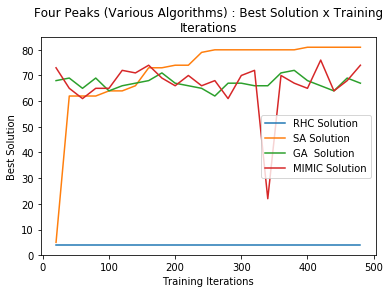

In [5]:
plt.figure()
title = "Four Peaks (Various Algorithms) : Best Solution x Training Iterations"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(max_iteration_list, fitness_list_RHC, '-', label='RHC Solution')
plt.plot(max_iteration_list, fitness_list_SM, '-', label='SA Solution')
plt.plot(max_iteration_list, fitness_list_GA, '-', label='GA  Solution')
plt.plot(max_iteration_list, fitness_list_MIMIC, '-', label='MIMIC Solution')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Best Solution')
filename = 'CountOnes_Iterations.png'
plt.savefig("../plots/" + filename)